## Introduction to Plotly and Cufflinks

Plotly is a charting library built on top of d3.js that can be used directly with Pandas data frames thanks to another library called Cufflinks.
Cufflink is a python library that connects plotly and pandas, allowing us to draw charts directly on data frames. It’s essentially a plug-in.

Plotly charts are interactive, allowing us to hover overvalues, zoom in and out of graphs, and identifying outliers in the dataset. Matplotlib and seaborn charts, on the other hand, are static; we can’t zoom in or out, and every value on the chart isn’t detailed. Plotly’s most important feature is that it allows us to create dynamic web charts directly from python, which is not possible with matplotlib. We can also make animations and interactive graphs out of geographical, scientific, statistical, and financial data using plotly.

*We will use Plotly interactive plots with Pandas data frames using a Titanic Dataset.*

### Importing Required Libraries

**The Pandas, Plotly, and Cufflinks libraries will be loaded first. Because plotly is an online platform, it requires a login credential to use it online. We’ll use offline mode in this article, which is sufficient for Jupyter Notebook.**

In [1]:
import pandas as pd
import cufflinks as cf
import plotly.offline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

### Load the Dataset

**We mentioned that we’ll be using the Titanic dataset,Only the train.csv file will be used.**

In [3]:
df=pd.read_csv("C:/Users/S_The/Downloads/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1.Histogram

Histograms can be used to inspect the distributions of a feature, such as the “Age” feature in this case. We simply use the (dataframe[“column name”]) syntax to select a column and then add the iplot function. As an example, we can specify bin size, theme, title, and axis names. With the “help(df.iplot)” command, you can see all the parameters for the iplot parameter.

In [4]:
df["Age"].iplot(kind="histogram", bins=20, theme="white", title="Passenger's Ages",xTitle='Ages', yTitle='Count')

**You can plot two different distributions as two different columns if you want to compare them. We will, for example, plot the ages of female and male passengers in the same plot.**

In [5]:
df["male_age"]=df[df["Sex"]=="male"]["Age"]
df["female_age"]=df[df["Sex"]=="female"]["Age"]
df[["male_age","female_age"]].iplot(kind="histogram", bins=20, theme="white", title="Passenger's Ages",
         xTitle='Ages', yTitle='Count')

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'male_age',
       'female_age'],
      dtype='object')

### Heatmap

**we’ll use Heatmap to check the correlation between features in a dataset as an example.**

<AxesSubplot:title={'center':'Feature Correlation Matrix'}>

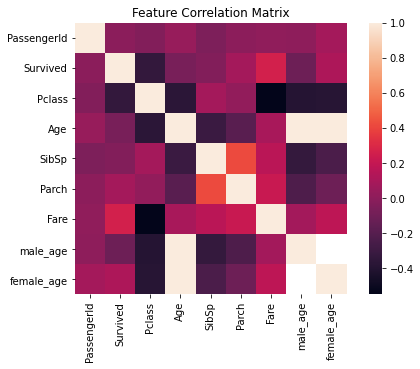

In [17]:
df = df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'male_age',
       'female_age']]
cor = df.corr()
plt.figure(figsize = (8, 5))
plt.title('Feature Correlation Matrix')
sns.heatmap(cor, square = True)

### 2.Boxplot

In [8]:
#we will get help from pivot tables to get Fare values in different columns for each class.
df[['Pclass', 'Fare']].pivot(columns='Pclass', values='Fare').iplot(kind='box')

### 3.ScatterPlot

**Scatter plots are commonly used to visualize the relationship between two numerical variables. For the variables “Fare” and “Age,” we’ll use scatter plots. “Categories” allows us to display the variables of a selected feature in various colors (sex of passengers in this case).**

In [9]:
df.iplot(kind="scatter", theme="white",x="Age",y="Fare",
            categories="Sex")

c:\python\python39\lib\site-packages\cufflinks\plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

c:\python\python39\lib\site-packages\cufflinks\plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



### 4.Bubble Chart

**We can use bubble charts to see multiple variable relationships at the same time. With the “categories” and “size” parameters in plotly, we can easily adjust colour and size subcategories. With the “text” parameter, we can also specify the hover text column.**

In [11]:
#converting Survived column to float64 to be able to use in plotly
df[['Survived']] = df[['Survived']].astype('float64', copy=False)
df.iplot(kind='bubble', x="Fare",y="Age",categories="Survived", size='Pclass', text='Name', xTitle='Fare', yTitle='Age')

c:\python\python39\lib\site-packages\cufflinks\plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

c:\python\python39\lib\site-packages\cufflinks\plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

c:\python\python39\lib\site-packages\cufflinks\plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

c:\python\python39\lib\site-packages\cufflinks\plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



### 5.Bar Graph

**Bar graphs are good to present the data of different groups that are being compared with each other. Plus they can be used stacked to show different variable effects. We will make a bar graph to show survived passenger count by sex.**

In [12]:
survived_sex = df[df['Survived']==1]['Sex'].value_counts()
dead_sex = df[df['Survived']==0]['Sex'].value_counts()
df1 = pd.DataFrame([survived_sex,dead_sex])
df1.index = ['Survived','Dead']
df1.iplot(kind='bar',barmode='stack', title='Survival by the Sex')

### 6.Surface Plot

In [19]:
df1.iplot(kind ='surface', colorscale ='rdylbu')

## Conclusion

As we’ve seen, both Plotly and Cufflinks are often powerful tools in their title , although they are available with their own quirks and challenges. If we would like something quick to use within the Jupyter notebook, we might reach to the new Plotly and Cufflinks framework..